In [1]:
# Show Matplotlib plots inline
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read city_data.csv file into pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read ride_data.csv file into pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# INSPECTING - city data - count total records
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# INSPECTING - city data - check for null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# INSPECTING - city data - check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# INSPECTING - city data - Get the unique values of the type of city + count records
city_data_df.groupby(["type"]).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [9]:
# INSPECTING - ride data - count total records
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# INSPECTING - ride data - check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# INSPECTING - ride data - check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# MERGE the two clean datasets
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [13]:
# Create separate DF for each city type
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [14]:
# Count # of rides per city for each DF
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [15]:
# Determine average fare per city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [16]:
# Determine average # drivers per city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

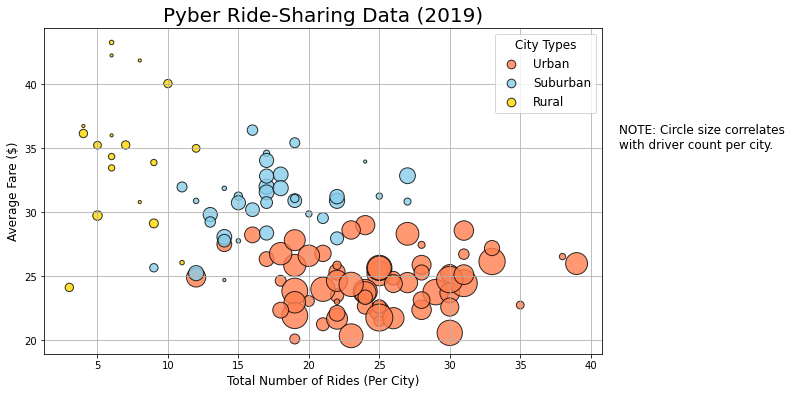

In [39]:
# Build scatter plot for each city type separately

# Set the size of the figure before plotting
plt.subplots(figsize=(10,6))

# URBAN
plt.scatter(urban_ride_count, urban_avg_fare, color='coral',
            s=urban_driver_count*10, linewidths=1, edgecolor = 'k', alpha=0.8, label='Urban')

# SUBURBAN
plt.scatter(suburban_ride_count, suburban_avg_fare, color='skyblue',
            s=suburban_driver_count*10, linewidths=1, edgecolor = 'k', alpha=0.8, label='Suburban')

# RURAL
plt.scatter(rural_ride_count, rural_avg_fare, color='gold',
            s=rural_driver_count*10, linewidths=1, edgecolor = 'k', alpha=0.8, label='Rural')

# FORMAT CHART + set font size
plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid()

# FORMATTING THE LEGEND
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1,
                 loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Add a text note regarding circle size
plt.text(42,35,'NOTE: Circle size correlates\nwith driver count per city.', fontsize='12')

# SAVE the figure
plt.savefig('Analysis/Fig1.png', bbox_inches='tight', facecolor='grey', transparent=True)

plt.show()